In [2]:
import numpy as np 
import csv
import matplotlib
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

plt.rcParams['font.size'] = '14'
plt.rcParams["font.family"] = "Times New Roman"

def gpm2ms(data):
    return 1*data/15850.323
def f2k(data):
    return (data + 459.67)* 5/9
def psig2pa(data):
    return(6894.75728*data)

data = np.genfromtxt('sim_data/simlong1.csv', delimiter=',')[1:,:]
data = data.astype(np.float32)
data_inputs1 = np.genfromtxt('data/3power/unit1_cleaned.csv', delimiter=',')[1:,:]
data_inputs1 = data_inputs1.astype(np.float32)

data_inputs2 = np.genfromtxt('data/3power/unit2_cleaned.csv', delimiter=',')[1:,:]
data_inputs2 = data_inputs2.astype(np.float32)

data_inputs3 = np.genfromtxt('data/3power/unit3_cleaned.csv', delimiter=',')[1:,:]
data_inputs3 = data_inputs3.astype(np.float32)


with open('sim_data/simlong1.csv', 'r') as infile:
    reader = csv.DictReader(infile)
    header= reader.fieldnames
header_sim = [key for key in header]


with open('data/3power/unit1_cleaned.csv', 'r') as infile:
    reader = csv.DictReader(infile)
    header= reader.fieldnames
header_inputs = [key for key in header]

# inputs = [2,4,6,15,23]
# header_input = [header_inputs[key] for key in inputs]

inputs = [0,1]



output1 = [11,16,19,0,3,14]
header_u1 = [header_sim[key] for key in output1]
output2 = [12,17,19,1,4,14]
header_u2 = [header_sim[key] for key in output2]
output3 = [13,18,19,2,5,14]
header_u3 = [header_sim[key] for key in output3]

data1 = np.hstack([data_inputs1[:,inputs],data[:,output1]])
data2 = np.hstack([data_inputs2[:,inputs],data[:,output2]])
data3 = np.hstack([data_inputs3[:,inputs],data[:,output3]])

data1 = data1[:6000,:]
data2 = data2[:6000,:]
data3 = data3[:6000,:]
data_all = np.vstack([data1,data2,data3])
scaler = MinMaxScaler()
scaler.fit(data_all)
data1n = scaler.transform(data1)
data2n = scaler.transform(data2)
data3n = scaler.transform(data3)

train1 = data1n[:5000,:]
train2 = data2n[:5000,:]
train3 = data3n[:5000,:]

test1 = data1n[5000:,:]
test2 = data2n[5000:,:]
test3 = data3n[5000:,:]

In [3]:
header_u3

['brinein_m3', 'pumpspeed2', 'AmbientT', 'gross_p2', 'pumpcost2', 'brineout_T']

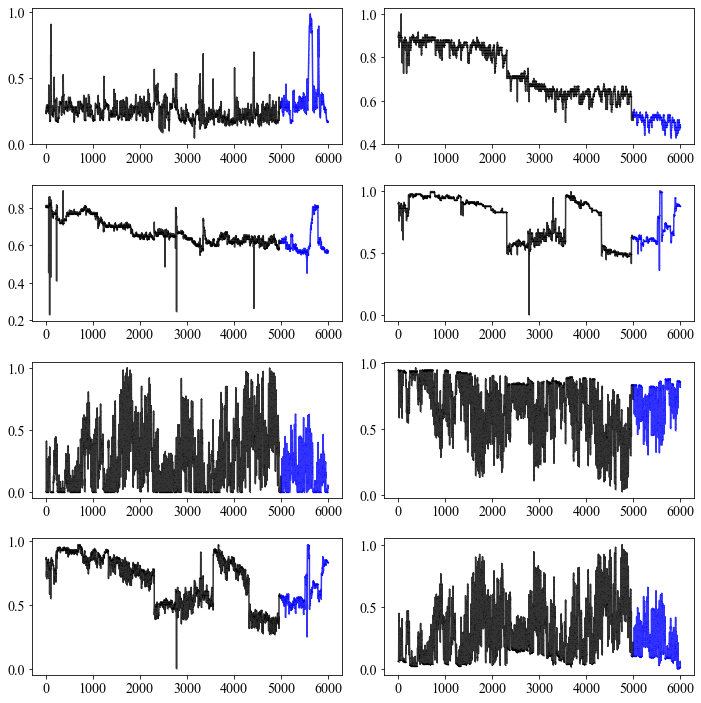

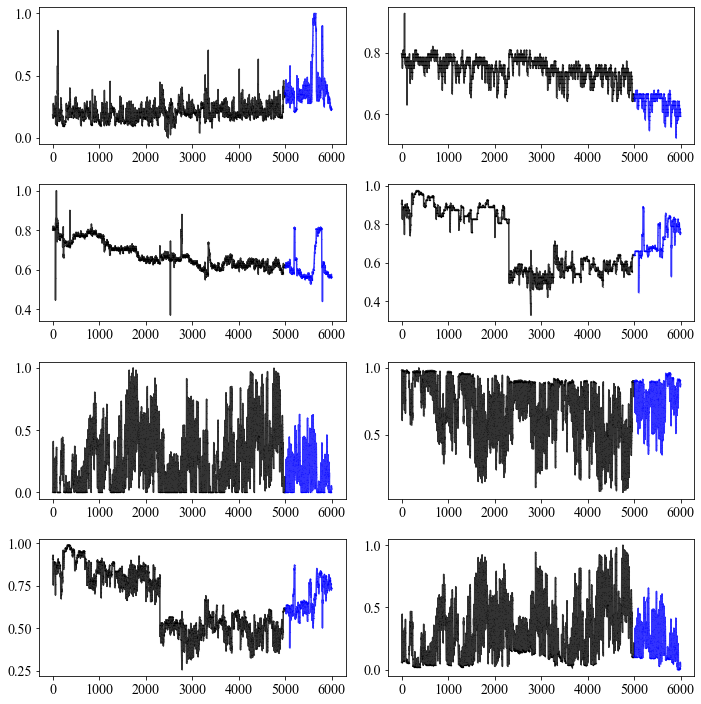

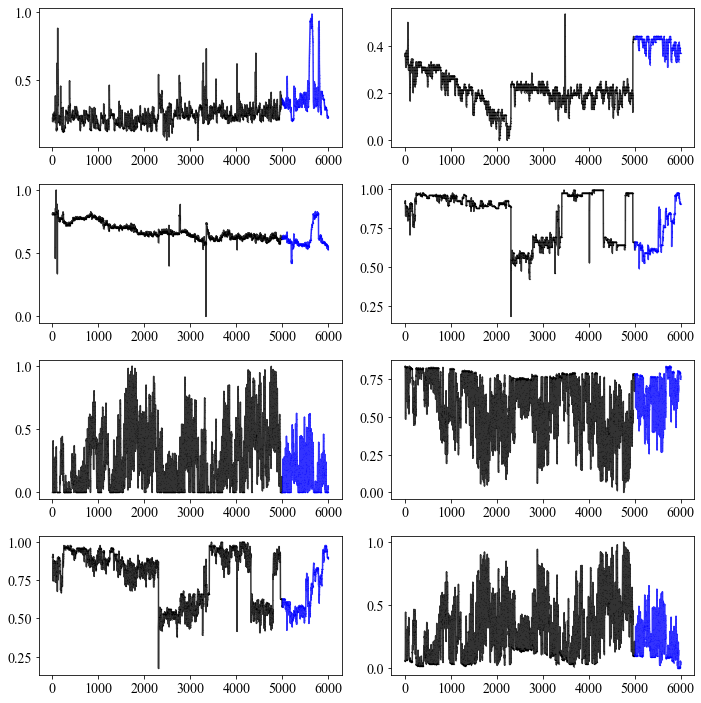

In [4]:
def plot_data(train,  test):
    n1 =len(train)
    n2 = n1+len(test)
    ncols = 2
    nrows = 4
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10))
    axesf = axes.flatten()
    
    for j in range(train.shape[1]):
            ax1 = axesf[j]
            ax1.plot(train[:,j], color='black', marker='o', markersize=0.1, label='Train' , alpha=0.8)
            ax1.plot(range(n1,n2),test[:,j], color='blue', marker='o', markersize=0.1, label='Test', alpha=0.8)          
#             ax1.set_title(header[j], fontsize =15)
 
    fig.tight_layout()
    
# header = ['Brine T','Brine Q','Pump speed','Ambient T','Power Gen','Pump cost']
plot_data(train1,test1 ) 
plot_data(train2,test2 )
plot_data(train3,test3 )

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5, 10)  # 5*5 from image dimension
        self.fc2 = nn.Linear(10, 20)
        self.fc3 = nn.Linear(20, 3)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

In [6]:
# RMSE = []
# MAPE = [] 
# RMSE_d = []
# MAPE_d = [] 

# RMSE1 = []
# MAPE1 = []
# modelname0 = 'Unit3'

# Train = True

# train = train3
# test = test3
# trainlen= len(train)
# header = ['brine_p','brine_t','brine_q','pump speed','ambient T','Power','Cost']


# bestname = '1'
# best_loss_all = 10
# for i in range(10):
#     print('current'+str(i))
#     modelname =modelname0+str(i)+'.pt'
#     device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')   # use GPU if available
#     net = Net()   # transfer model to GPU if available
#     net = net.train()   # set model in train mode (eg batchnorm params get updated)
#     if True:
# #             opt = optim.Adam(net.parameters(), lr=lr_c)       # create optimizer instance
#         criterion = nn.MSELoss()   
#         train_it = 0
#         best_loss = 100
#         batch_size = 16
#         epochs = 100
#         val_loss = []
#         rec_loss = []
#         vallen = int(trainlen*0.7)
#         for ep in range(epochs):
#             opt = optim.Adam(net.parameters(), lr=0.01)    
#             np.random.seed(int(time.time()))
#             trainl = np.arange(len(train))
#             np.random.shuffle(trainl)
#             int(trainlen*0.7)
#             traintemp = train[trainl[:vallen],:] 
#             val = train[trainl[vallen:],:] 
#             val = torch.from_numpy(val)
#             traintemp = torch.from_numpy(traintemp)
# #             print("Run Epoch {}".format(ep))

#             Trains = torch.utils.data.DataLoader(traintemp,batch_size=batch_size)    

#             for Train in Trains:
#                 train_x = Train[:,:5]
#                 train_y = Train[:,5:]
#                 opt.zero_grad()
#                 outputs = net(train_x)
#                 # loss
#                 total_loss = criterion(outputs, train_y)

#                 # backward
#                 total_loss.backward()
#                 # update the weights
#                 opt.step()

#                 if train_it % 1000 == 0:
#                     print("It {}: Reconstruction Loss: {}".format(train_it, total_loss))
#                 train_it += 1


#             val_output = net(val[:,:5]) 
#             val_loss1 = criterion(val_output,val[:,5:])
#             val_loss.append(val_loss1)
#             train_output = net(traintemp[:,:5])
#             total_loss = criterion(train_output, traintemp[:,5:])
#             rec_loss.append(total_loss)

# #             print("It {}: Validation Loss: {}".format(ep, val_loss1))
#             if val_loss1 < best_loss:
#                 torch.save(net.state_dict(), 'dlmodel_his/sim/'+modelname)
#                 best_loss = val_loss1

#     net = Net()
#     net.load_state_dict(torch.load('dlmodel_his/sim/'+modelname))
#     net = net.eval() 
#     testx = torch.from_numpy(test[:,:5])
#     pred = net(testx).detach().numpy()
#     testy = test[:,5:]

#     temp = np.abs(pred-testy)/testy
#     mse = np.round(np.sqrt(np.mean((pred- testy)**2,axis =0)),3)
#     mae = np.round(np.mean(temp,axis =0),3)
#     if np.mean(mse)<best_loss_all:
#         bestname = modelname
#         best_loss_all = np.mean(mse)
#     print(mse)
#     print(mae)


#     RMSE.append(np.mean(mse))
#     MAPE.append(np.mean(mae))
#     RMSE_d.append(np.std(mse))
#     MAPE_d.append(np.std(mae))  

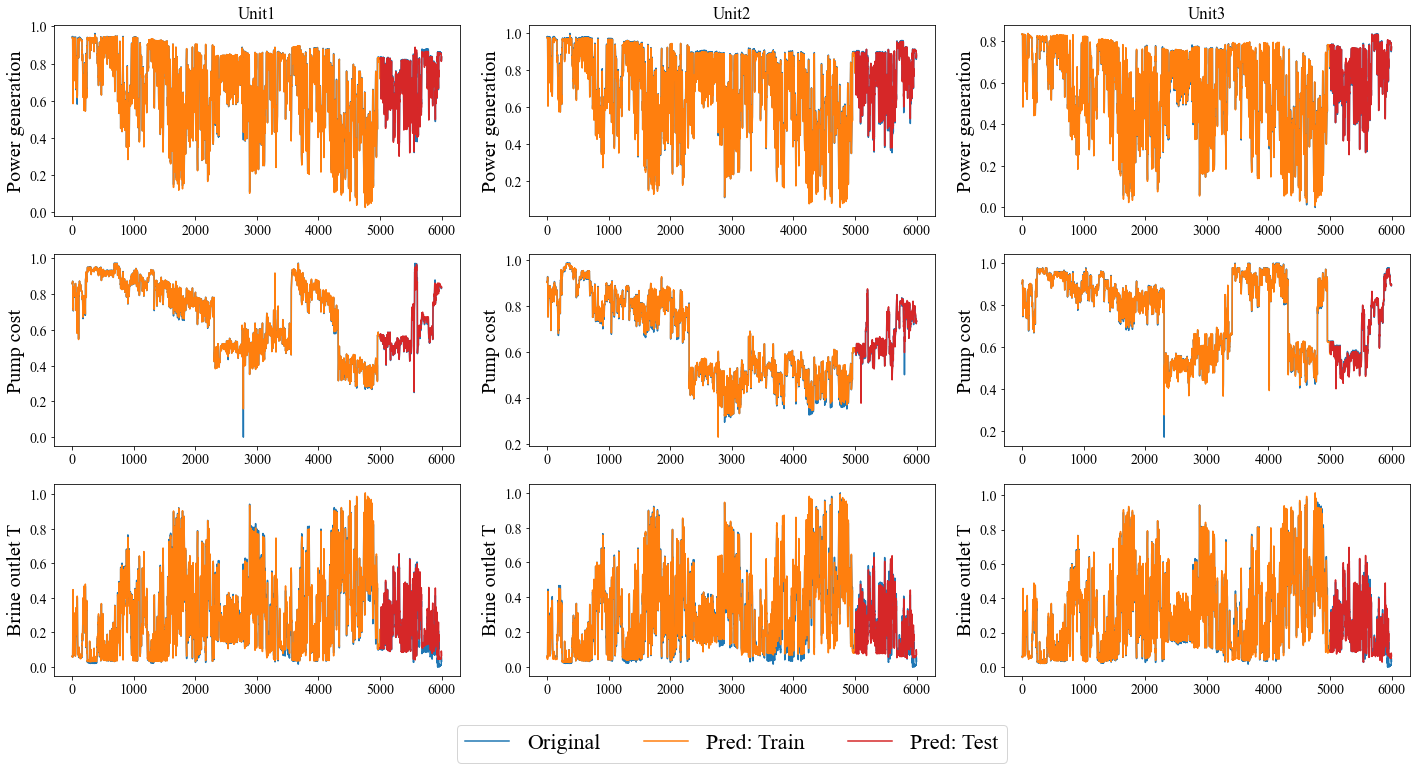

In [7]:
header_new = ['Power generation','Pump cost','Brine outlet T']
unitname=['Unit1','Unit2','Unit3']

datanew1 = np.vstack([train1,test1])
datanew2 = np.vstack([train2,test2])
datanew3 = np.vstack([train3,test3])
net1 = Net()
net1.load_state_dict(torch.load( 'dlmodel_his/sim_Opt/'+'Unit1.pt'))
net1.eval() 
test1_newx = torch.from_numpy(datanew1[:,:5])
pred1 = net1(test1_newx).detach().numpy()
test1y = datanew1[:,5:]

net2 = Net()
net2.load_state_dict(torch.load( 'dlmodel_his/sim_Opt/'+'Unit2.pt'))
net2.eval() 
test2_newx = torch.from_numpy(datanew2[:,:5])
pred2 = net2(test2_newx).detach().numpy()
test2y = datanew2[:,5:]

net3 = Net()
net3.load_state_dict(torch.load( 'dlmodel_his/sim_Opt/'+'Unit3.pt'))
net3.eval() 
test3_newx = torch.from_numpy(datanew3[:,:5])
pred3 = net3(test3_newx).detach().numpy()
test3y = datanew3[:,5:]


fig, axes = plt.subplots(3, 3, figsize=(20, 10))
for i in range(3):
    axes[i,0].plot(test1y[:,i],label ='Original')
    axes[i,0].plot(pred1[:5000,i],color ='tab:orange',label ='Pred: Train')
    axes[i,0].plot(range(5000,6000),pred1[5000:,i],color ='tab:red',label ='Pred: Test')
    axes[i,0].set_ylabel(header_new[i],fontsize = 20)
    
    axes[i,1].plot(test2y[:,i],label ='Original')
    axes[i,1].plot(pred2[:5000,i],color ='tab:orange',label ='Pred: Train')
    axes[i,1].plot(range(5000,6000),pred2[5000:,i],color ='tab:red',label ='Pred: Test')
    axes[i,1].set_ylabel(header_new[i],fontsize = 20)

    
    axes[i,2].plot(test3y[:,i],label ='Original')
    axes[i,2].plot(pred3[:5000,i],color ='tab:orange',label ='Pred: Train')
    axes[i,2].plot(range(5000,6000),pred3[5000:,i],color ='tab:red',label ='Pred: Test')
    axes[i,2].set_ylabel(header_new[i],fontsize = 20)
    
    
    axes[0,i].set_title(unitname[i])
    
plt.tight_layout()
axes.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3,fontsize = 22)

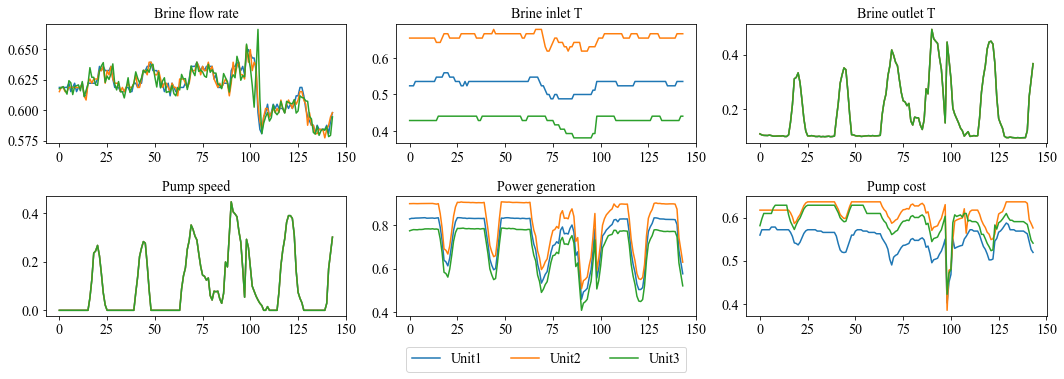

In [8]:
n_opt = 144
test1n = test1[:n_opt]
test2n = test2[:n_opt]
test3n = test3[:n_opt]

fig, axes = plt.subplots(2, 3, figsize=(15, 5))

axes = axes.flatten()

axes[0].plot(test1n[:,2],label = 'Unit1')
axes[0].plot(test2n[:,2],label = 'Unit2')
axes[0].plot(test3n[:,2],label = 'Unit3')
axes[0].set_title('Brine flow rate',fontsize = 14)
# axes[0].legend()

axes[1].plot(test1n[:,1],label = 'Unit1')
axes[1].plot(test2n[:,1],label = 'Unit2')
axes[1].plot(test3n[:,1],label = 'Unit3')
axes[1].set_title('Brine inlet T',fontsize = 14)

axes[2].plot(test1n[:,7],label = 'Unit1')
axes[2].plot(test2n[:,7],label = 'Unit2')
axes[2].plot(test3n[:,7],label = 'Unit3')
axes[2].set_title('Brine outlet T',fontsize = 14)

axes[3].plot(test1n[:,4],label = 'Unit1')
axes[3].plot(test2n[:,4],label = 'Unit2')
axes[3].plot(test3n[:,4],label = 'Unit3')
axes[3].set_title('Pump speed',fontsize = 14)

axes[4].plot(test1n[:,5],label = 'Unit1')
axes[4].plot(test2n[:,5],label = 'Unit2')
axes[4].plot(test3n[:,5],label = 'Unit3')
axes[4].set_title('Power generation',fontsize = 14)

axes[5].plot(test1n[:,6],label = 'Unit1')
axes[5].plot(test2n[:,6],label = 'Unit2')
axes[5].plot(test3n[:,6],label = 'Unit3')
axes[5].set_title('Pump cost',fontsize = 14)

plt.tight_layout()
axes.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3,fontsize = 14)

In [8]:
from scipy.optimize import minimize,Bounds,SR1
from scipy import optimize
from scipy.optimize import rosen, differential_evolution
import scipy

tmp = scaler.data_max_-scaler.data_min_
# scaler = joblib.load(scaler_filename) 
# net.load_state_dict(torch.load('./history/model_all1.pt'))
# net = net.eval() 
class OPT():
    def __init__(self, inputs, step):
        self.x = np.copy(inputs)
        self.step = step
    def renew(self,i):
        self.iter  = i 
        self.inputs = self.x[i:i+step,:]
#         print(self.inputs.shape)
    def objfun(self,x):
        x = np.tile(x, (step,1))
        input_tmp1 = self.inputs[:,:5]
        input_tmp2 = self.inputs[:,5:10]
        input_tmp3 = self.inputs[:,10:15]
        #assignx
        input_tmp1[:,2] = x[:,0]
        input_tmp2[:,2] = x[:,1]
        input_tmp3[:,2] = x[:,2]
        input_tmp1[:,3] = x[:,3]
        input_tmp2[:,3] = x[:,4]
        input_tmp3[:,3] = x[:,5]
        
        ##
        net1 = Net()
        net1.load_state_dict(torch.load( 'dlmodel_his/sim_Opt/'+'Unit1.pt'))
        net1.eval() 
        
        net2 = Net()
        net2.load_state_dict(torch.load( 'dlmodel_his/sim_Opt/'+'Unit2.pt'))
        net2.eval() 

        net3 = Net()
        net3.load_state_dict(torch.load( 'dlmodel_his/sim_Opt/'+'Unit3.pt'))
        net3.eval() 

        result1 = net1(torch.tensor(input_tmp1)).detach().numpy()
        result2 = net2(torch.tensor(input_tmp2)).detach().numpy()
        result3 = net3(torch.tensor(input_tmp3)).detach().numpy()
        result1 = result1*tmp[-3:]+scaler.data_min_[-3:]
        result2 = result2*tmp[-3:]+scaler.data_min_[-3:]
        result3 = result3*tmp[-3:]+scaler.data_min_[-3:]
    
        return -np.sum(result1[:,0]+result2[:,0]+result3[:,0]-result1[:,1]-result2[:,1]-result3[:,1])

step = 1

b = [[0,1]]*3+[[0,1]]*3

    
inputs1 = torch.from_numpy(np.copy(test1n))
inputs2 = torch.from_numpy(np.copy(test2n))
inputs3 = torch.from_numpy(np.copy(test3n))
inputs = np.hstack([inputs1[:,:5],inputs2[:,:5],inputs3[:,:5]])
totalb = test1n[:,2]+test2n[:,2]+test3n[:,2]
mpc = OPT(inputs,step)

result = []
result_fun = []

for i in range(n_opt //step):
    mpc.renew(i*step)
    
    x0 = [test1n[i,2],test2n[i,2],test3n[i,2],1,1,1]
    def con(t):
            return t[0] + t[1]+ t[2] - totalb[i]
    cons = {'type':'eq', 'fun': con}
    res = minimize(mpc.objfun, x0,bounds=b, constraints=cons,options={'ftol': 1e-5,'eps':1e-5})
    
    
    print(i)
    print(res.success)
    result.extend([res.x]*step)
    result_fun.append(-res.fun)
    
result = np.array(result).reshape([-1,6])

0
True
1
True
2
True
3
True
4
True
5
True
6
True
7
True
8
True
9
True
10
True
11
True
12
True
13
True
14
True
15
True
16
True
17
True
18
True
19
True
20
True
21
True
22
True
23
True
24
False
25
True
26
True
27
True
28
True
29
True
30
True
31
True
32
True
33
True
34
True
35
True
36
True
37
True
38
True
39
True
40
True
41
True
42
True
43
True
44
True
45
True
46
True
47
True
48
True
49
True
50
True
51
True
52
True
53
True
54
True
55
True
56
True
57
True
58
True
59
True
60
True
61
True
62
True
63
True
64
True
65
True
66
True
67
True
68
True
69
True
70
True
71
True
72
True
73
True
74
True
75
True
76
True
77
True
78
False
79
True
80
True
81
True
82
True
83
True
84
True
85
True
86
True
87
True
88
True
89
True
90
True
91
True
92
True
93
True
94
True
95
False
96
True
97
True
98
True
99
True
100
True
101
True
102
True
103
True
104
True
105
True
106
True
107
True
108
True
109
True
110
True
111
True
112
True
113
True
114
True
115
True
116
True
117
True
118
True
119
True
120
True
121
True
122
False

In [9]:
res.success

True

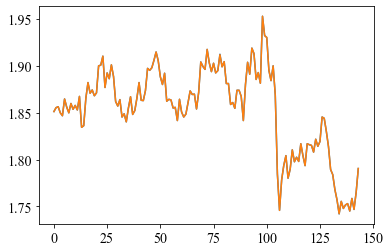

In [10]:
plt.plot(test1n[:,2]+test2n[:,2]+test3n[:,2])
plt.plot(np.sum(result[:,:3],axis = 1))

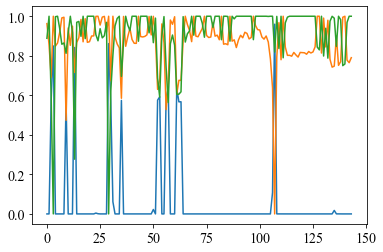

In [11]:
plt.plot(result[:,0])
plt.plot(result[:,1])
plt.plot(result[:,2])

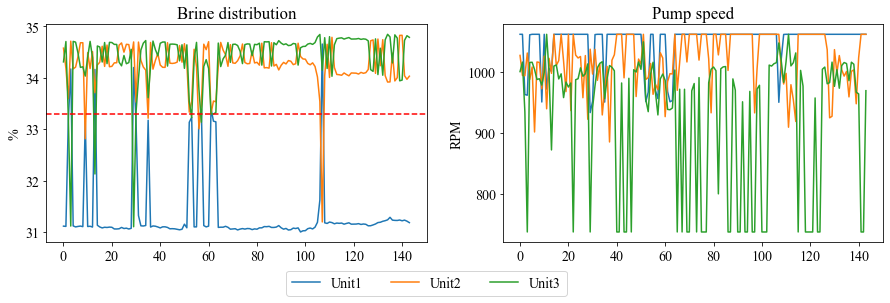

In [12]:
def transb(brine):
    return brine*tmp[2]+scaler.data_min_[2]

def transpump(pump):
    return pump*tmp[3]+scaler.data_min_[3]

def transpower(power):
    return power*tmp[-4]+scaler.data_min_[-4]
def transcost(cost):
    return cost*tmp[-2]+scaler.data_min_[-2]
b1 = transb(result[:,0])
b2 = transb(result[:,1])
b3 = transb(result[:,2])
bt = b1+b2+b3

p1 = transpump(result[:,3])
p2 = transpump(result[:,4])
p3 = transpump(result[:,5])

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
axes[0].plot(b1*100/bt,label = 'Unit1')
axes[0].plot(b2*100/bt,label = 'Unit2')
axes[0].plot(b3*100/bt,label = 'Unit3')
axes[0].axhline(y=33.3, color='r', linestyle='--')
axes[0].set_ylabel('%')
axes[0].set_title('Brine distribution')

axes[1].plot(p1,label = 'Unit1')
axes[1].plot(p2,label = 'Unit2')
axes[1].plot(p3,label = 'Unit3')
axes[1].set_ylabel('RPM')
axes[1].set_title('Pump speed')

# plt.tight_layout()
axes.flatten()[0].legend(loc='upper center', bbox_to_anchor=(1, -0.1), ncol=3,fontsize = 14)

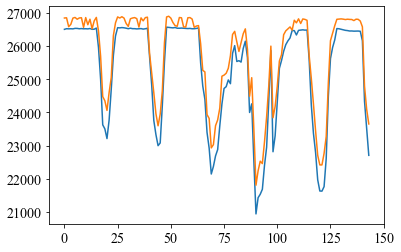

In [13]:
recover1 = pred1*tmp[5:]+scaler.data_min_[5:]
recover2 = pred2*tmp[5:]+scaler.data_min_[5:]
recover3 = pred3*tmp[5:]+scaler.data_min_[5:]
net = recover1[:,-3]+recover2[:,-3]+recover3[:,-3]-(recover1[:,-2]+recover2[:,-2]+recover3[:,-2])
plt.plot(net[5000:5000+n_opt])
plt.plot(result_fun)


In [14]:
np.mean(result_fun-net[5000:5000+n_opt])

442.07657

In [15]:
result.shape

(144, 6)

In [16]:
result[:,4]

array([0.89323898, 0.79189526, 0.79046538, 0.90528749, 0.77114952,
       0.83457148, 0.5058433 , 0.8599781 , 0.85766244, 0.72411904,
       0.88947259, 0.62318539, 0.87838393, 0.80249774, 0.99999991,
       0.84253953, 0.8667389 , 1.        , 0.86456565, 0.71028316,
       0.99999809, 0.6140516 , 0.99999954, 0.89474413, 0.88019152,
       0.88777987, 0.67916946, 0.89238442, 0.57020944, 0.92462302,
       0.79885316, 0.92374681, 0.76724022, 0.85031913, 0.59203466,
       0.72222807, 0.83765056, 0.45535969, 0.86896215, 0.8966355 ,
       0.99999998, 0.99999999, 0.99999997, 0.77967335, 0.99999994,
       1.        , 0.99999903, 0.99938818, 0.68508137, 0.87479633,
       0.84884142, 0.99999846, 0.7716681 , 0.78102565, 0.85244485,
       0.69629806, 0.74667363, 0.72004079, 0.90668583, 0.88005809,
       0.58334498, 0.76031291, 0.80101802, 0.79928687, 1.        ,
       0.71659677, 0.85624957, 1.        , 0.99999984, 0.86004232,
       0.99999718, 0.99999793, 0.99999997, 1.        , 0.86944

In [17]:
out_test1 = np.copy(test1[:n_opt,:])
out_test2 = np.copy(test2[:n_opt,:])
out_test3 = np.copy(test3[:n_opt,:])

out_test1[:,2] = result[:,0]
out_test2[:,2] = result[:,1]
out_test3[:,2] = result[:,2]
out_test1[:,3] = result[:,3]
out_test2[:,3] = result[:,4]
out_test3[:,3] = result[:,5]

out_test1 = scaler.inverse_transform(out_test1)
out_test2 = scaler.inverse_transform(out_test2)
out_test3 = scaler.inverse_transform(out_test3)

header1 = ['Brine_p','brine_t']+header_u1


def writeOutput(result, headername, filename):
    result = np.array(result)
    output2 = pd.DataFrame(result,columns=headername)
    output2.to_csv(filename, index=False)
    
writeOutput(out_test1,header1, 'data/3power/Unit1_opt.csv')
writeOutput(out_test2,header1, 'data/3power/Unit2_opt.csv')
writeOutput(out_test3,header1, 'data/3power/Unit3_opt.csv')

out_test1 = np.copy(test1[:n_opt,:])
out_test2 = np.copy(test2[:n_opt,:])
out_test3 = np.copy(test3[:n_opt,:])

out_test1 = scaler.inverse_transform(out_test1)
out_test2 = scaler.inverse_transform(out_test2)
out_test3 = scaler.inverse_transform(out_test3)

writeOutput(out_test1,header1, 'data/3power/Unit1_test.csv')
writeOutput(out_test2,header1, 'data/3power/Unit2_test.csv')
writeOutput(out_test3,header1, 'data/3power/Unit3_test.csv')

In [18]:
%run .\Simlong3power_opt.py


144
SimCentral.Client.Auto loaded from installed location C:\Users\Wei_L\AppData\Local\SimSci\SimCentral\Client
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
!!!
51
!!!
52
!!!
53
!!!
54
!!!
55
!!!
56
!!!
57
!!!
58
!!!
59
!!!
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122


AggregateException: One or more errors occurred.
   at System.Threading.Tasks.Task`1.GetResultCore(Boolean waitCompletionNotification)

In [ ]:
%run .\Simlong3power_test.py

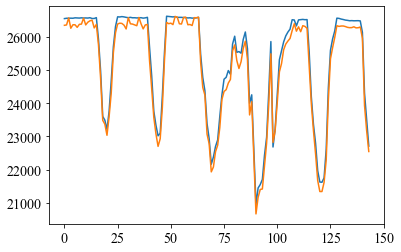

In [10]:
data_opt = np.genfromtxt('sim_data/simlong_opt.csv', delimiter=',')[1:,:]
data_test = np.genfromtxt('sim_data/simlong_test.csv', delimiter=',')[1:,:]
plt.plot(data_test[:,9])
plt.plot(data_opt[:,9])